In [1]:
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import os

In [2]:
SOURCE_ = '57_32sec.wav'
SOURCE = '57_16sec.wav'

In [3]:
y, sr = librosa.load(SOURCE)
# librosa.display.waveshow(y)

In [4]:
stft = librosa.stft(y, hop_length=512)
# librosa.display.waveshow(stft1) # 안 됨
# plt.plot(stft)

In [5]:
abs_stft = np.abs(stft)

In [6]:
# plt.plot(abs_stft)

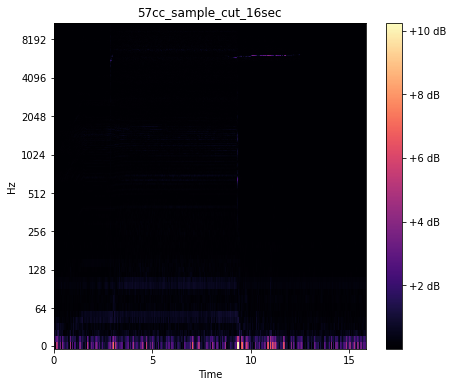

In [7]:
fig, ax = plt.subplots(figsize=(7, 6))
img = librosa.display.specshow(abs_stft,
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('57cc_sample_cut_16sec')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

In [8]:
amp_to_db_abs_stft = librosa.amplitude_to_db(abs_stft,ref=np.max)

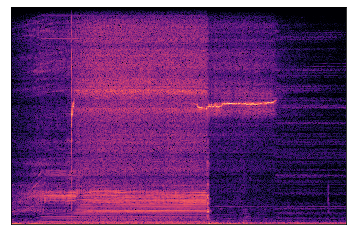

In [9]:
librosa.display.specshow(amp_to_db_abs_stft)

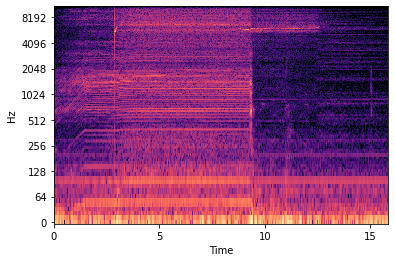

In [10]:
librosa.display.specshow(amp_to_db_abs_stft, y_axis='log', x_axis='time')

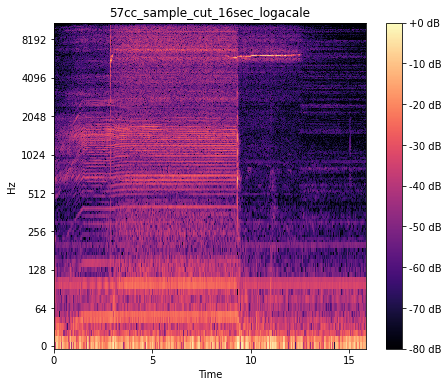

In [11]:
fig, ax = plt.subplots(figsize=(7, 6))
# fig, ax = plt.subplots(figsize=(12, 6))
img = librosa.display.specshow(amp_to_db_abs_stft,
                               y_axis='log', x_axis='time', ax=ax)
# ax.set_title('57cc_sample_original_31sec_logscale')
ax.set_title('57cc_sample_cut_16sec_logacale')
fig.colorbar(img, ax=ax, format="%+2.0f dB")


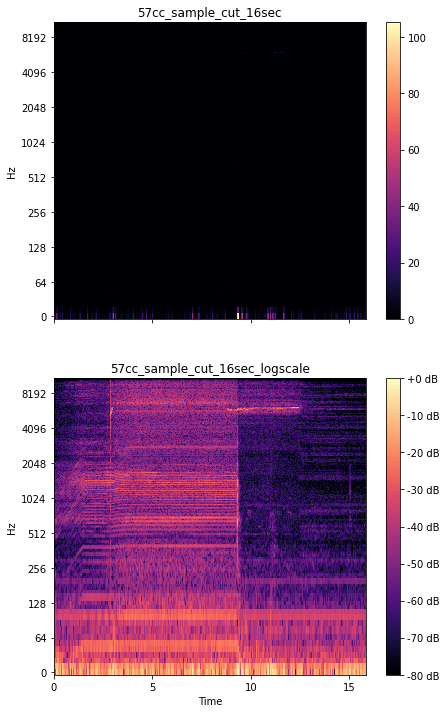

In [13]:
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(7, 12))
imgpow = librosa.display.specshow(abs_stft**2, sr=sr, y_axis='log', x_axis='time',
                                  ax=ax[0])
ax[0].set(title='57cc_sample_cut_16sec')
ax[0].label_outer()
imgdb = librosa.display.specshow(librosa.power_to_db(abs_stft**2, ref=np.max),
                                 sr=sr, y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='57cc_sample_cut_16sec_logscale')
fig.colorbar(imgpow, ax=ax[0])
fig.colorbar(imgdb, ax=ax[1], format="%+2.0f dB")